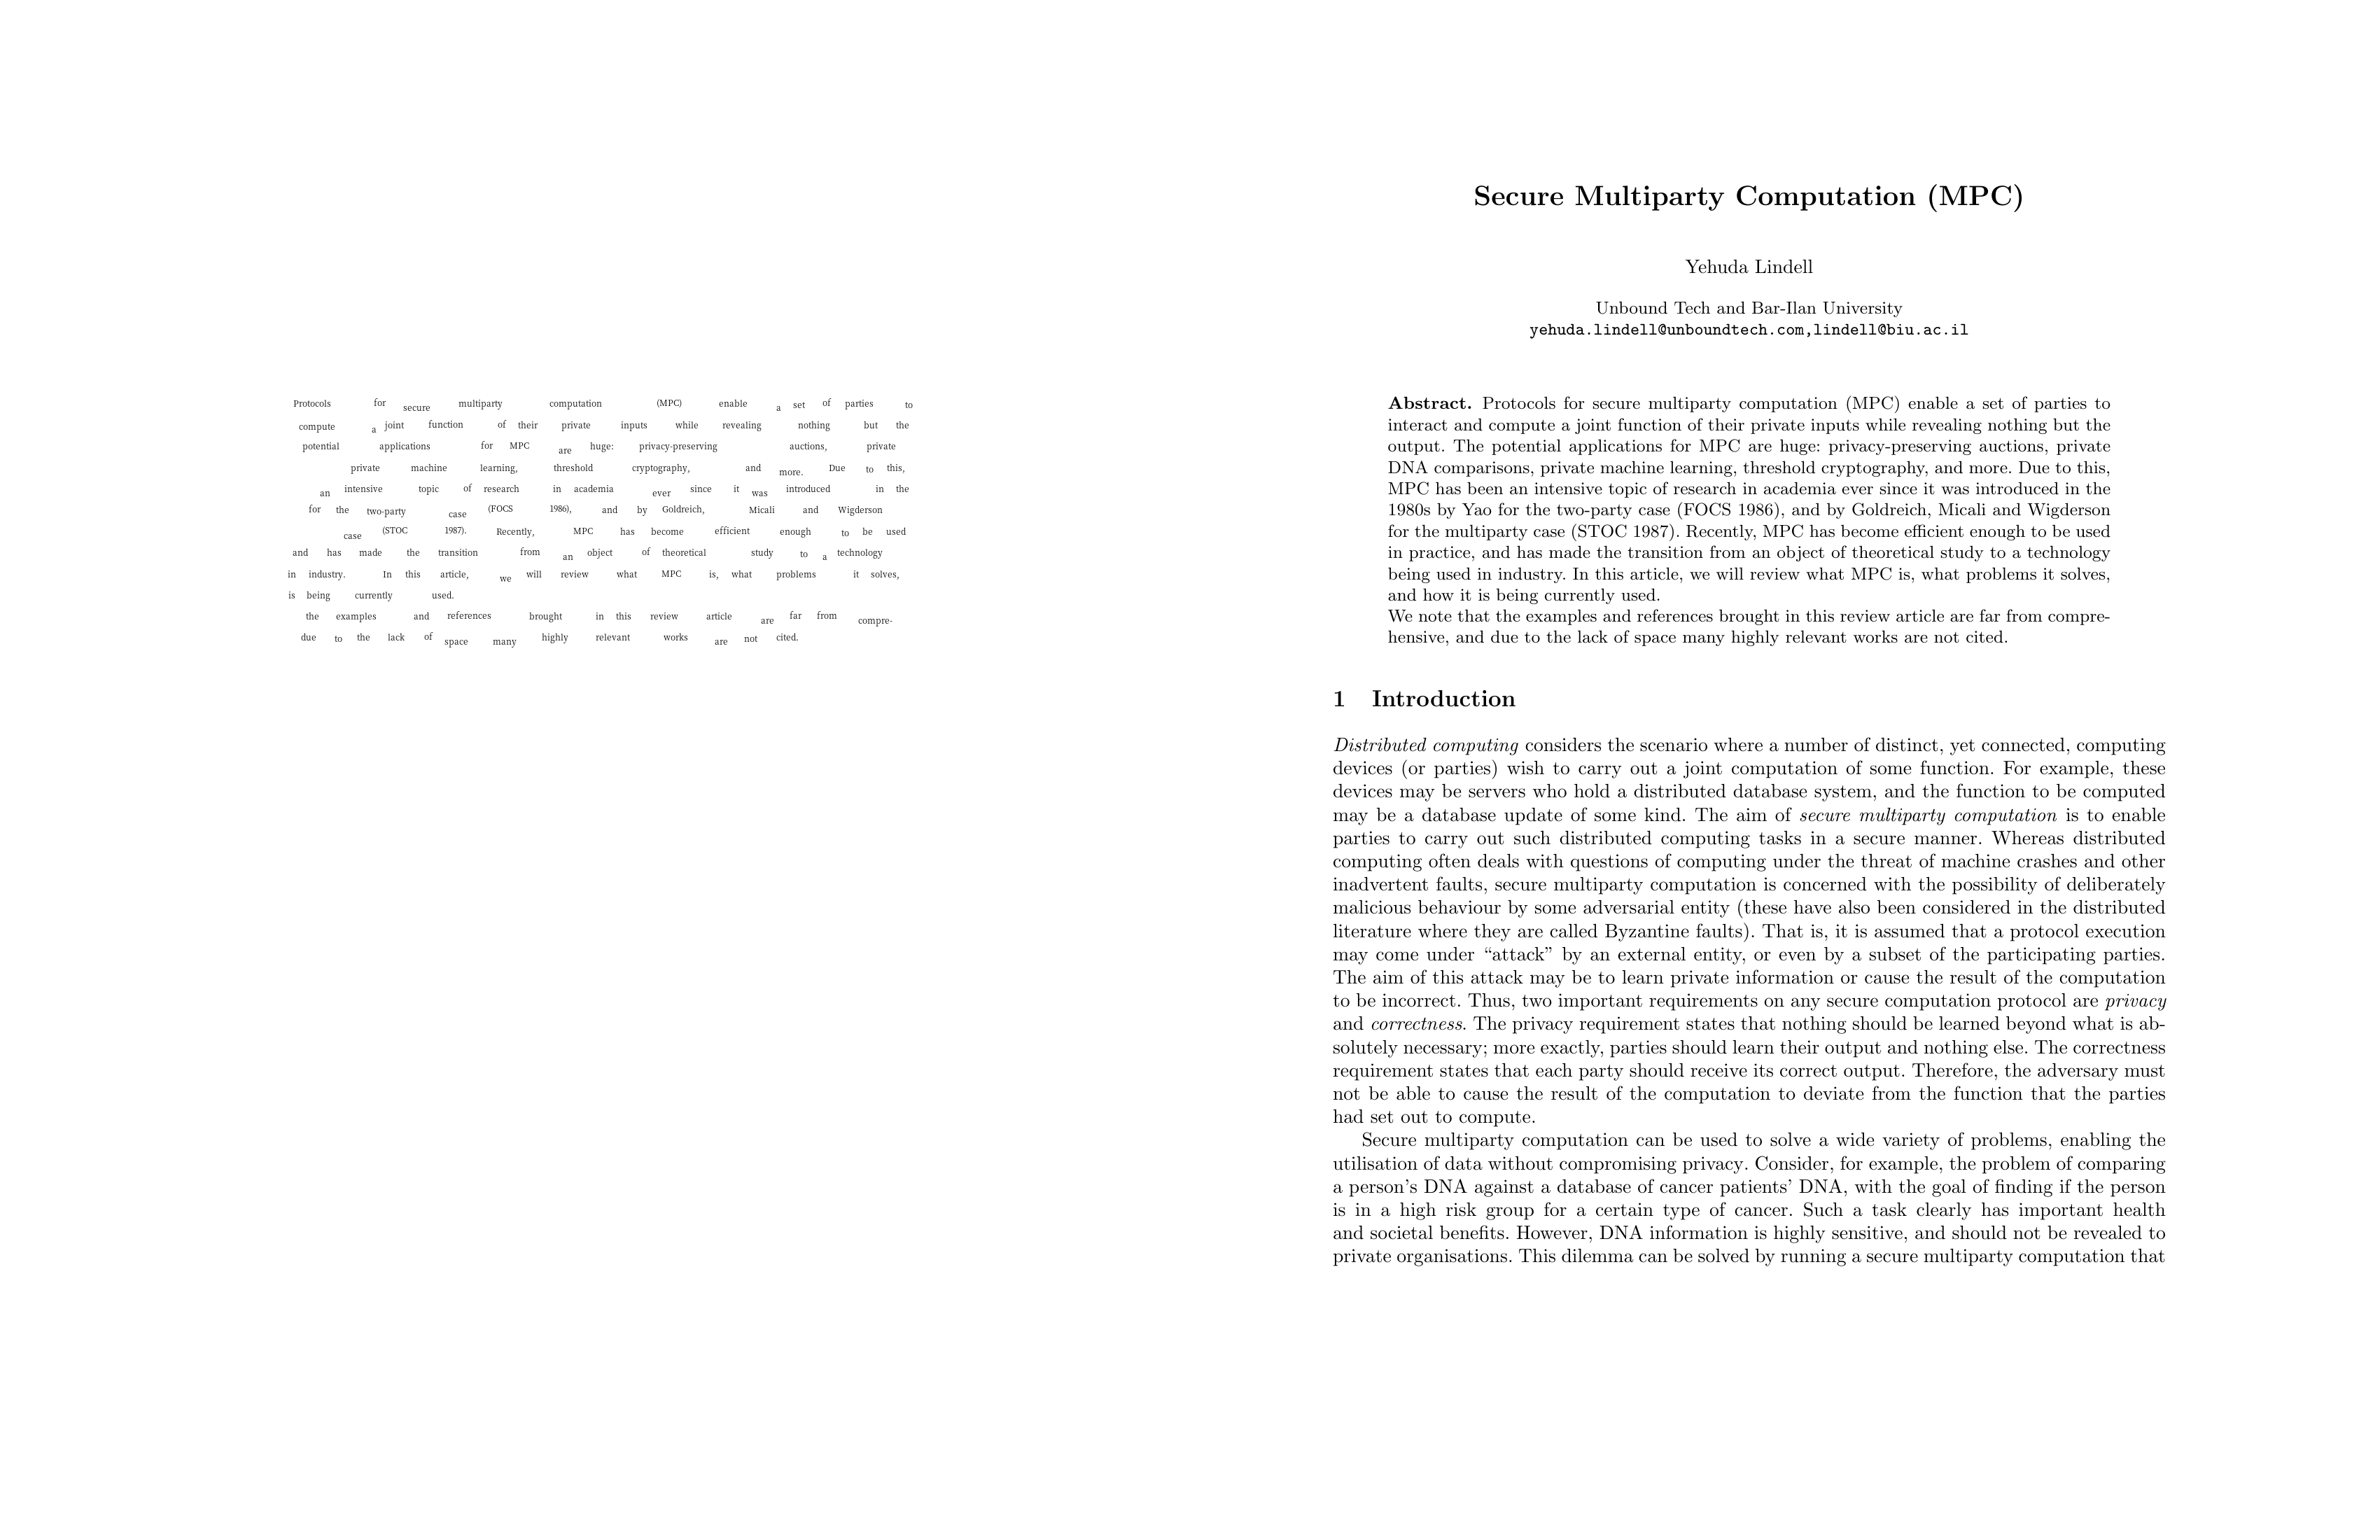

In [12]:
import layoutparser as lp
import pdf2image
%matplotlib inline
import numpy as np

#file name
pdf_file= 'mpc-cacm-eprint.pdf'

#first page of the pdf, converted to an image
img = np.asarray(pdf2image.convert_from_path(pdf_file, poppler_path="C:\Python38\Lib\poppler\poppler-22.01.0\Library\\bin")[0])

#ocr agent
ocr = lp.TesseractAgent()

res = ocr.detect(img, return_response=True)

layout = ocr.gather_data(res, lp.TesseractFeatureType(4))

#filtered output, containing text in the range of specified coodinates
filtered_abstract = layout.filter_by(
    lp.Rectangle(x_1=410, y_1=500, x_2=1400, y_2=1000)
)

#writing the extracted abstract to a file
f = open('abstract.txt', 'a')
for word in filtered_abstract._blocks:
    f.write(word.text + " ")

f.close()

#drawing the result
lp.draw_text(img, filtered_abstract, font_size=12, with_box_on_text=True,
             text_box_width=1)
